In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm

In [39]:
# Simple
data = pd.read_csv("cars.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [40]:
x = data.iloc[:,1].values
y = data.iloc[:,0].values

r = np.corrcoef(x,y)
r # Correlation

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [41]:
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y) # Make a Linear Regression

LinearRegression()

In [42]:
model.intercept_

8.28390564178717

In [43]:
model.coef_

array([0.16556757])

In [44]:
# Calculate speed as a function of distance (value == 22)
model.predict([[22]])

array([11.92639228])

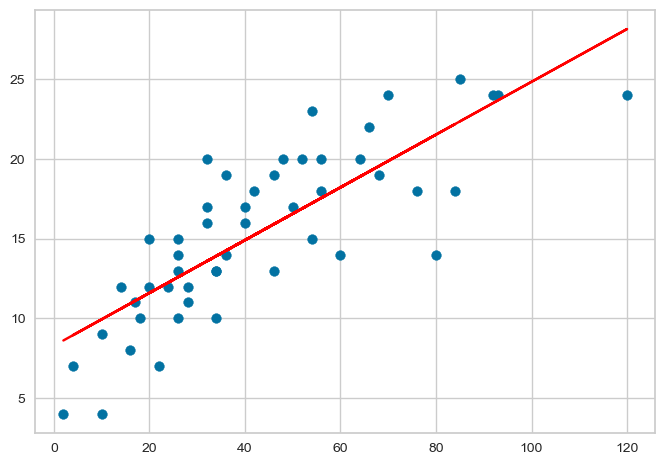

In [45]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
plt.show()

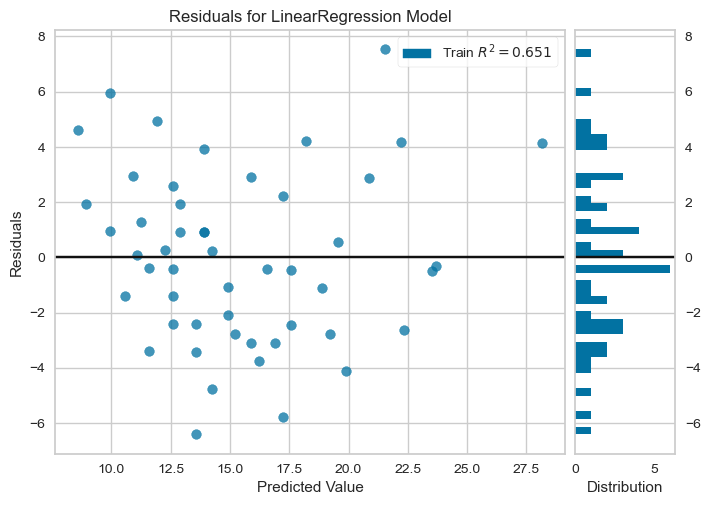

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
residueVisualiser = ResidualsPlot(model)
residueVisualiser.fit(x,y)
residueVisualiser.poof()

In [47]:
# Multiple
data = pd.read_csv("mt_cars.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [54]:
# Make a Linear Regression
model2 = sm.ols(formula="mpg ~ cyl + disp + hp", data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           5.05e-09
Time:                        12:42:45   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Predict
newData = pd.DataFrame({
    'cyl' : [4],
    'disp' : [200],
    'hp' : [100]
})

model2.predict(newData).values

array([24.03968887])